<a href="https://colab.research.google.com/github/Wilgdj/Metricas-de-Avaliacao-de-Aprendizado/blob/main/M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
%load_ext tensorboard

In [ ]:
logdir = 'log'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
           y=train_labels,
           epochs=5,
           validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8904 - loss: 0.3443 - val_accuracy: 0.9861 - val_loss: 0.0434
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9854 - loss: 0.0488 - val_accuracy: 0.9827 - val_loss: 0.0591
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9893 - loss: 0.0364 - val_accuracy: 0.9897 - val_loss: 0.0294
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9911 - val_loss: 0.0277
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9911 - val_loss: 0.0281


In [ ]:
# Obtendo as previsões do modelo
y_pred_probs = model.predict(test_images)  # Saída de probabilidades

# Convertendo as probabilidades para classes (índices do maior valor)
y_pred = np.argmax(y_pred_probs, axis=1)

# y_true permanece o mesmo
y_true = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

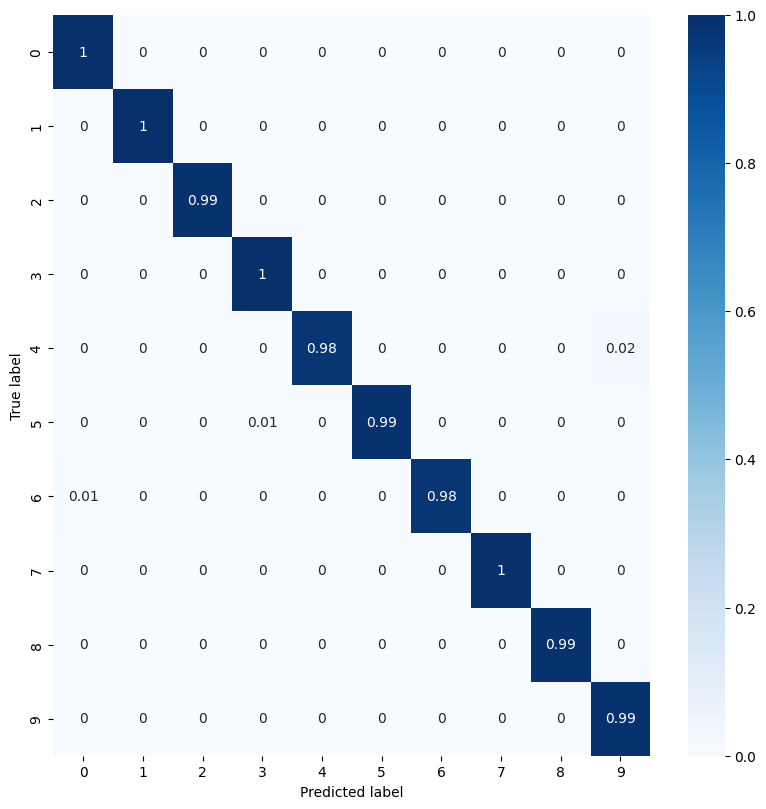

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt

In [ ]:
TP = con_mat[1,1]
TN = con_mat[0,0]
FP = con_mat[0,1]
FN = con_mat[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
recall = TP / (TP + FN)
f1_score = 2 * precision * recall / (precision + recall)

In [ ]:
print(f"Acurácia: {accuracy:.2f}")
print(f"Sensibilidade (Recall): {recall:.2f}")
print(f"Especificidade: {specificity:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Acurácia: 1.00
Sensibilidade (Recall): 1.00
Especificidade: 1.00
Precisão: 1.00
F1-Score: 1.00
